# CE-40959: Deep Learning
## HW2 - CIFAR-10 Classification (Pytorch)

(18 points)

### Deadline: 23 Esfand

#### Name: Sadroddin Barikbin
#### Student No.: 98208824


Please review `Pytorch Tutorial` notebook (materials of the TA classes) before coming to this notebook and you can use `pytorch.org` to learn how to use PyTorch classes and commands.

In this part you have to implement MLP for Classification of CIFAR-10 dataset. 

PyTorch provides the elegantly designed modules and classes `torch.nn`, `torch.optim` , `Dataset` , and `DataLoader` to help you create and train neural networks. In this homework you use them for your implementations.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
%cd "drive/My Drive/Colab Data"

In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
import torchvision


#### 3.1. Load Data:

Complete the followed cell for data loading. 
In this cell you have to normalize, split and shuffle data for learning.

In [2]:
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
indices=list(range(len(trainset)))
np.random.shuffle(indices)
train_idx, valid_idx = indices[10000:], indices[:10000]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
batch_size_train = 256
batch_size_test = 256
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size_train, sampler=train_sampler)
validationloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size_train, sampler=valid_sampler)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader=torch.utils.data.DataLoader(testset, batch_size=batch_size_test)
##################################################################################
# TODO: Use 'torchvision.datasets.CIFAR-10' class for loading CIFAR-10 dataset.  #
# This dataset has 50000 data for training and 10000 data for test and every     #
# data has shape (3*32*32).                                                      #
# Also Use 'torchvision.transforms.Compose' for common image transformations     #
# such as normalization and use 'torch.utils.data.DataLoader' class that it      #
# represents a Python iterable over a dataset and divides data to Batches.       #
# Then Split data into 3 part: Train, Validation and Test. Finally,              #
# save iterable data in 'trainloader', 'validationloader', 'testloader'.         #
##################################################################################



##################################################################################
#                               End of your code                                 #
##################################################################################

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


#### 3.2. Load Data Test:

In [3]:
############################################################
# Run the following code an check the size of each batch   #
############################################################
examples = enumerate(trainloader)
batch_idx, (example_data, example_targets) = next(examples)
print('The size and type of each batch in ''trainloader'' is:')
print(example_data.size())
print(type(example_data))
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)
print('\nThe size and type of each batch in ''testloader'' is:')
print(example_data.size())
print(type(example_data))

The size and type of each batch in trainloader is:
torch.Size([256, 3, 32, 32])
<class 'torch.Tensor'>

The size and type of each batch in testloader is:
torch.Size([256, 3, 32, 32])
<class 'torch.Tensor'>


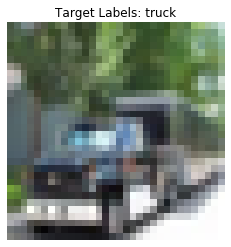

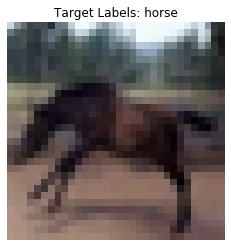

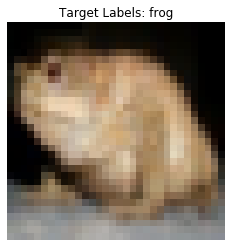

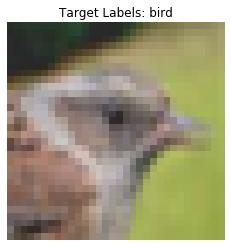

In [0]:
#####################################################################
# Run the following code and see some of the samples in the dataset #
#####################################################################

dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images:
for i in range(4):
    img=torchvision.utils.make_grid(images[i])
    ###########################################################
    #  If you normalize data , here unnormalize them to see   # 
    #  clear them.                                            #
    ###########################################################
    m=0.5
    s=0.5
    img = img *s+m    # unnormalize
    ###########################################################
    #                   End of your code                      #
    ###########################################################
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2, 0)))
    plt.title("Target Labels: {}".format(classes[labels[i]]))
    plt.axis('off')
    plt.show()
    

#### 3.3. Network Design:
Design the layer of your network and select proper hyperparameter. 



In [0]:
import torch.nn as nn
import torch.nn.functional as F
######################################################################
# TODO: Use 'torch.nn' module to design your network for CIFAR-10    #
# classification. You have to implement the structure of MLP for it. #
# In your design you don't have any limitation and you can use       #
# Batch-norm layers, Drop-out layers and etc for generalization      #
# improvement (if needed). Use classes and modules from 'torch.nn'.  #
# In the following code, the 'MLP' class is your MLP network and     #
# this class is inherited from nn.Module, so you can benefit         #
# properties of the 'nn.Module'.You may complete '__init__()'        #
# constructor by some classes like 'nn.ReLU()' or 'nn.Linear()'      #
# to use them in the forward pass of your network.                   #
######################################################################
  
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        # self.do=nn.Dropout()
        # self.cv=nn.Conv2d(3,100,2,stride=2)
        # self.mp=nn.MaxPool2d(4)
        # self.cv2=nn.Conv2d(100,10,2)
        # self.bn=nn.BatchNorm2d(10)
        # self.fl=nn.Flatten()
        # self.fc=nn.Linear(90,10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        # out=self.do(x)
        # out=self.cv(out)
        # out=self.mp(out)
        # out=self.cv2(out)
        # out=self.bn(out)
        # out=self.fl(out)
        # out=torch.relu(out)
        # out=self.fc(out)
        # return out
######################################################################
#                          End of your code                          #
######################################################################

#### 3.4. Optimization Algorithm:

In [24]:
import torch.optim as optim

#############################################################################
# TODO: Use a Classification Cross-Entropy loss.Then, use 'torch.optim'     #
# module to optimize Cross-Entropy loss. You should select a optimization   #
# algorithm and its hyperparameters like learning rate.                     #
#############################################################################
net = MLP()
learning_rate = 0.1
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
#optimizer = optim.Adam(net.parameters(),lr=learning_rate),weight_decay=0.3)
if torch.cuda.device_count() > 1:
  print("Let's use", torch.cuda.device_count(), "GPUs!")
  net = nn.DataParallel(net)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net.to(device)

#############################################################################
#                             End of your code                              #
#############################################################################

cuda:0


MLP(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

#### 3.5. Training:
You have to tweak `hidden_dim`, `leanirng_rate`, `weight_scale`, `num_epochs` and `reg` and etc to get a validation accuracy above 50%.

In [25]:
#######################################################
# TODO: Feed the inputs data to the MLP network and   #
# optimize Cross-Entropy loss by using target labels. #
# Then update weights and biases.                     #
#######################################################

num_epochs=30
num_batchs = len(trainloader)
for epoch in range(num_epochs):
    total_train=0
    correct_train=0
    running_loss = 0.0
    for batch, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()  
        #############################################
        #           End of your code                #
        #############################################
        

        # Results: 
        running_loss += loss.item()
        total_train += labels.size(0)
        _, predicted_train = torch.max(outputs.data, 1)
        correct_train += (predicted_train == labels).sum().item()

        if batch % (num_batchs/10) == ((num_batchs/10) -1):
            print('[Batch %d / %d] loss: %.3f' %
                  (batch + 1, num_batchs, running_loss / (num_batchs/10)))
            running_loss = 0.0
            torch.save(net.state_dict(), './model.pth')
            torch.save(optimizer.state_dict(), './optimizer.pth')
    correct = 0
    total = 0
    with torch.no_grad():
        for data in validationloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_acc = correct / total
    train_acc = correct_train / total_train
    print('(Epoch %d / %d) train acc: %.2f%%; val_acc: %.2f%%' % (
          epoch+1, num_epochs, 100*train_acc, 100*val_acc))

(Epoch 1 / 30) train acc: 30.85%; val_acc: 43.39%
(Epoch 2 / 30) train acc: 46.20%; val_acc: 47.25%
(Epoch 3 / 30) train acc: 51.70%; val_acc: 51.01%
(Epoch 4 / 30) train acc: 55.24%; val_acc: 48.76%
(Epoch 5 / 30) train acc: 57.08%; val_acc: 53.61%
(Epoch 6 / 30) train acc: 59.95%; val_acc: 56.49%
(Epoch 7 / 30) train acc: 61.09%; val_acc: 58.55%
(Epoch 8 / 30) train acc: 63.27%; val_acc: 57.96%
(Epoch 9 / 30) train acc: 64.03%; val_acc: 58.52%
(Epoch 10 / 30) train acc: 64.90%; val_acc: 56.95%
(Epoch 11 / 30) train acc: 65.23%; val_acc: 57.61%
(Epoch 12 / 30) train acc: 66.23%; val_acc: 57.62%
(Epoch 13 / 30) train acc: 67.55%; val_acc: 57.71%
(Epoch 14 / 30) train acc: 68.63%; val_acc: 56.47%
(Epoch 15 / 30) train acc: 68.17%; val_acc: 57.57%
(Epoch 16 / 30) train acc: 69.05%; val_acc: 57.62%
(Epoch 17 / 30) train acc: 69.01%; val_acc: 57.00%
(Epoch 18 / 30) train acc: 70.53%; val_acc: 58.09%
(Epoch 19 / 30) train acc: 71.19%; val_acc: 56.43%
(Epoch 20 / 30) train acc: 69.26%; val_a

#### 3.6. Test: 
Run the following cell and test your network.

In [26]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
test_acc = correct / total
print('Accuracy of the network on the test images: %2f %%' % (100 * test_acc ))

Accuracy of the network on the test images: 55.690000 %


In [27]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 56 %
Accuracy of   car : 38 %
Accuracy of  bird : 69 %
Accuracy of   cat : 27 %
Accuracy of  deer : 61 %
Accuracy of   dog : 40 %
Accuracy of  frog : 44 %
Accuracy of horse : 50 %
Accuracy of  ship : 76 %
Accuracy of truck : 58 %
